# MNIST를 CNN 활용하여 모델링하기
- MNIST 데이터 모델링
- 모델 저장 및 불러오기
- 내 손글씨 테스트하기

## 라이브러리불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 데이터 불러오기

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


id = 9361
다음 그림은 숫자 6 입니다.


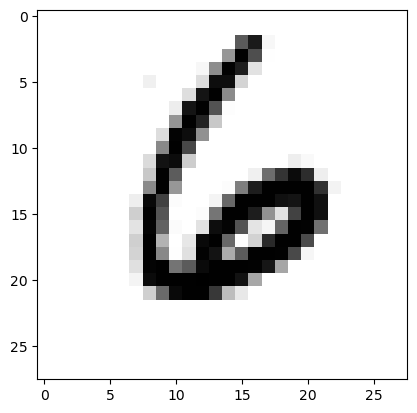

In [4]:
id = np.random.randint(0, 10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y[id]} 입니다.')

plt.imshow(test_x[id], cmap='Greys')
plt.show()

## 데이터 전처리

In [5]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=2023)

- Scaling

In [7]:
print('max :', train_x.max(),'  min :', train_x.min())

max : 255   min : 0


In [8]:
max_v, min_v = train_x.max(), train_x.min()
max_v, min_v

(255, 0)

In [9]:
train_x = (train_x - min_v) / (max_v - min_v)
val_x = (val_x - min_v) / (max_v - min_v)
test_x = (test_x - min_v) / (max_v - min_v)

print('max :', train_x.max(),'  min :', train_x.min())

max : 1.0   min : 0.0


- one-hot encoding

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
class_n = len(np.unique(train_y))

train_y = to_categorical(train_y, class_n)
val_y = to_categorical(val_y, class_n)
test_y = to_categorical(test_y, class_n)

train_x.shape, train_y.shape

((48000, 28, 28), (48000, 10))

- reshape

In [12]:
train_x = np.expand_dims(train_x, axis=-1)
val_x = np.expand_dims(val_x, axis=-1)
test_x = np.expand_dims(test_x, axis=-1)

train_x.shape, train_y.shape, val_x.shape, val_y.shape, test_x.shape, test_y.shape

((48000, 28, 28, 1),
 (48000, 10),
 (12000, 28, 28, 1),
 (12000, 10),
 (10000, 28, 28, 1),
 (10000, 10))

## 이미지 data augmentation

In [13]:
trainIDG = ImageDataGenerator(rotation_range=15,    # randomly rotate images in the range (degrees, 0 to 180)
                            zoom_range = 0.1,       # Randomly zoom image
                            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                            height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
                            horizontal_flip=False,  # randomly flip images
                            vertical_flip=False)    # randomly flip images

valIDG = ImageDataGenerator()

In [14]:
flow_trainIDG = trainIDG.flow(train_x, train_y, batch_size=256)
flow_valIDG = valIDG.flow(val_x, val_y, batch_size=256)

## 모델링 CNN

In [20]:
# 1. 세션 클리어
clear_session()

# 2. 레이어 엮기
il = Input(shape=(28,28,1))

hl = Conv2D(filters=64,          # Conv2D 필터를 통해 새롭게 제작하려는 feature map의 수
            kernel_size=(3,3),   # Conv2D 필터의 가로 세로 사이즈
            strides=(1,1),       # Conv2D 필터의 이동 보폭
            padding='same',      # 1. 기존의 사이즈를 보존하겠다. | 2. 외곽의 정보를 조금 더 반영하려고!
            activation='relu',   # 빼먹지 않게 주의!
            )(il)
hl = Conv2D(filters=64,          # Conv2D 필터를 통해 새롭게 제작하려는 feature map의 수
            kernel_size=(3,3),   # Conv2D 필터의 가로 세로 사이즈
            strides=(1,1),       # Conv2D 필터의 이동 보폭
            padding='same',      # 1. 기존의 사이즈를 보존하겠다. | 2. 외곽의 정보를 조금 더 반영하려고!
            activation='relu',   # 빼먹지 않게 주의!
            )(hl)
hl = MaxPool2D(pool_size=(2,2),  # Maxpool2D 필터의 가로 세로 사이즈
               strides=(2,2)     # Maxpool2D 필터의 이동 보폭 : 기본적으로 pool_size를 따른다.
               )(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.2)(hl)

hl = Conv2D(filters=128,         # Conv2D 필터를 통해 새롭게 제작하려는 feature map의 수
            kernel_size=(3,3),   # Conv2D 필터의 가로 세로 사이즈
            strides=(1,1),       # Conv2D 필터의 이동 보폭
            padding='same',      # 1. 기존의 사이즈를 보존하겠다. | 2. 외곽의 정보를 조금 더 반영하려고!
            activation='relu',   # 빼먹지 않게 주의!
            )(hl)
hl = Conv2D(filters=128,         # Conv2D 필터를 통해 새롭게 제작하려는 feature map의 수
            kernel_size=(3,3),   # Conv2D 필터의 가로 세로 사이즈
            strides=(1,1),       # Conv2D 필터의 이동 보폭
            padding='same',      # 1. 기존의 사이즈를 보존하겠다. | 2. 외곽의 정보를 조금 더 반영하려고!
            activation='relu',   # 빼먹지 않게 주의!
            )(hl)
hl = MaxPool2D(pool_size=(2,2),  # Maxpool2D 필터의 가로 세로 사이즈
               strides=(2,2)     # Maxpool2D 필터의 이동 보폭 : 기본적으로 pool_size를 따른다.
               )(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.2)(hl)

hl = Flatten()(hl)
hl = Dense(256, activation='relu')(hl)
ol = Dense(10, activation='softmax')(hl)

# 3. 모델의 시작과 끝 지정
model = Model(il, ol)

# 4. 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 64)        256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0     

- Early Stopping

In [16]:
es = EarlyStopping(monitor='val_loss',         # 얼리 스토핑을 적용할 관측 대상
                   min_delta=0,                # Threshold. 설정한 값 이상으로 변화해야 성능이 개선되었다고 간주.
                   patience=3,                 # 성능 개선이 발생하지 않았을 때, 몇 epoch를 더 지켜볼 것인가
                   verbose=1,
                   restore_best_weights=True)  # 성능이 가장 좋은 epoch의 가중치를 적용함.

- **Model Checkpoint**

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [27]:
mcp = ModelCheckpoint(filepath='./model_save/model.h5',   # 모델 저장 경로
                      monitor='val_loss',              # 모델 저장의 관심 대상
                      verbose=1,                       # 어느 시점에서 저장되는지 알려줌
                      save_best_only=True,             # 최고 성능 모델만 저장
                      save_weights_only=False)         # True : 가중치만 저장 | False : 모델 구조 포함하여 저장

- .fit( )

In [28]:
history = model.fit(flow_trainIDG, epochs=1, verbose=1,
                     validation_data=flow_valIDG,
                     callbacks=[es, mcp]
                     )

188/188 [==============================] - ETA: 0s - loss: 0.0355 - accuracy: 0.9891
Epoch 1: val_loss improved from inf to 0.03731, saving model to ./model_save\model.h5
188/188 [==============================] - 181s 962ms/step - loss: 0.0355 - accuracy: 0.9891 - val_loss: 0.0373 - val_accuracy: 0.9902


In [29]:
performance_test = model.evaluate(test_x, test_y, batch_size=256)

print(f'Test Loss: {performance_test[0]:.6f}')
print(f'Test Accuracy: {performance_test[1]*100:.3f}%')

40/40 [==============================] - 9s 213ms/step - loss: 0.0348 - accuracy: 0.9884
Test Loss: 0.034770
Test Accuracy: 98.840%


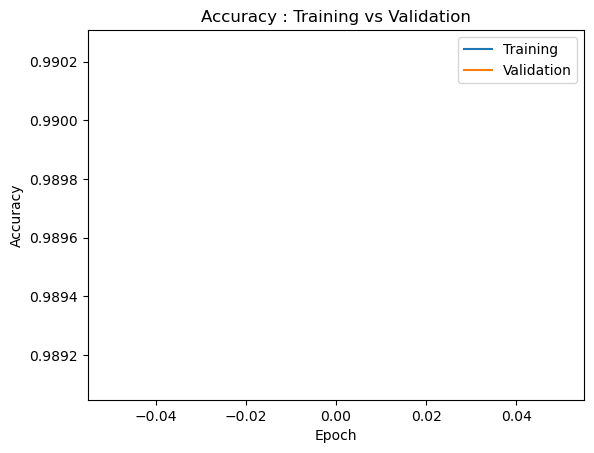

In [30]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

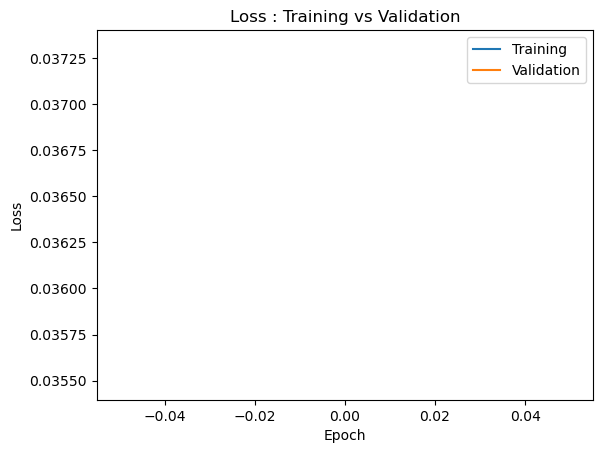

In [31]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

## 모델 저장 및 로드하기

- .save( )
- .load_model( )

- .save()

In [33]:
model.save('./model_save/saving_model.keras')

- .load_model()

In [34]:
clear_session()
model = keras.models.load_model('./model_save/saving_model.keras')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 64)        256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0     

- .predict( )

In [35]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%')
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%')

313/313 [==============================] - 13s 42ms/step
CNN
트레이닝 정확도 : 99.14%
테스트 정확도 : 98.84%


## 데이터 확인

id = 5544
다음 그림은 숫자 1 입니다.
모델의 예측 : 1
모델의 카테고리별 확률 : [ 0. 99.  0.  0.  0.  0.  0.  0.  0.  0.]
정답입니다


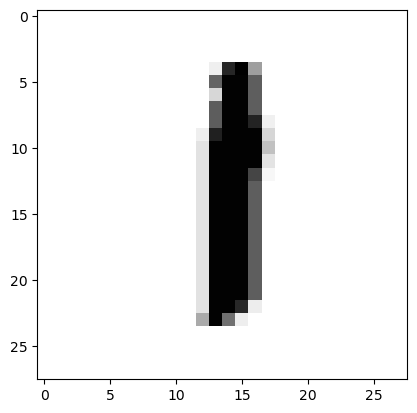

In [36]:
id = np.random.randint(0,10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]), cmap='Greys')
plt.show()

- 틀린 이미지만 확인해보기

id = 2414
다음 그림은 숫자 9 입니다.
모델의 예측 : 4
모델의 카테고리별 확률 : [ 0.  0.  0.  0. 60.  0.  0.  0. 23. 16.]
틀렸어요


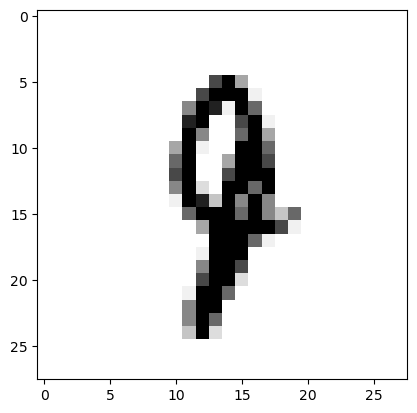

In [37]:
true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[np.random.randint(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]), cmap='Greys')
plt.show()

# 내 손글씨 테스트해보기

## 이미지 불러오기

In [49]:
import glob
from tensorflow.keras.preprocessing import image

files = glob.glob('./my_data/*')
files

['./my_data\\0.png',
 './my_data\\1.png',
 './my_data\\2.png',
 './my_data\\4.png',
 './my_data\\5.png',
 './my_data\\6.png',
 './my_data\\7.png',
 './my_data\\7_1.png',
 './my_data\\8.png',
 './my_data\\9.png']

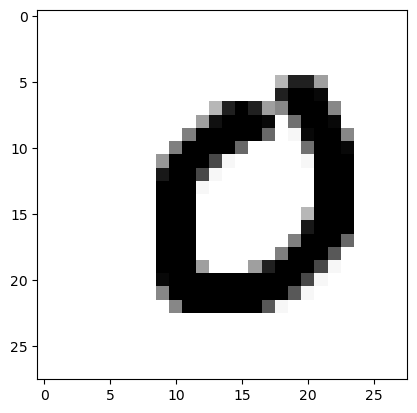

In [50]:
img = image.load_img(files[0], color_mode='grayscale', target_size=(28,28) )
img = image.img_to_array(img)

plt.imshow(img.reshape(img.shape[0], img.shape[1]), cmap='gray')
plt.show()

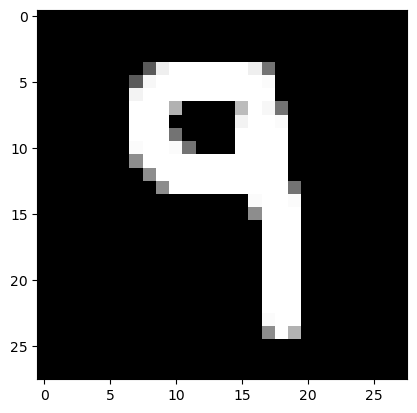

In [55]:
img = 255-img
plt.imshow(img.reshape(img.shape[0],img.shape[1]), cmap='Greys'  )
plt.show()

In [52]:
images = []

for path in files :
    img = image.load_img(path, color_mode='grayscale', target_size=(28,28) )
    img = image.img_to_array(img)
    img = 255-img
    images.append(img)

images = np.array(images)
images.shape

(10, 28, 28, 1)

- .predict()

In [53]:
model.predict(img.reshape((-1,28,28,1)))[0].argmax()

1/1 [==============================] - 0s 27ms/step


9

1/1 [==============================] - 0s 37ms/step
모델의 예측 : 0
모델의 카테고리별 확률 : [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]


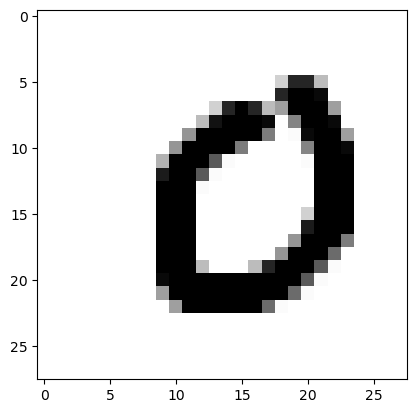

모델의 예측 : 8
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0.   0.   0. 100.   0.]


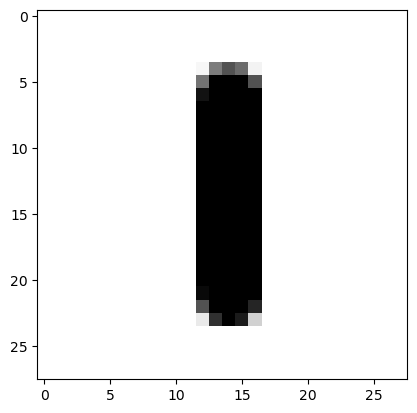

모델의 예측 : 2
모델의 카테고리별 확률 : [  0.   0. 100.   0.   0.   0.   0.   0.   0.   0.]


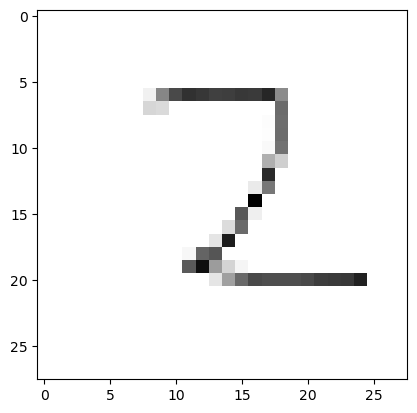

모델의 예측 : 8
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0.   0.   0. 100.   0.]


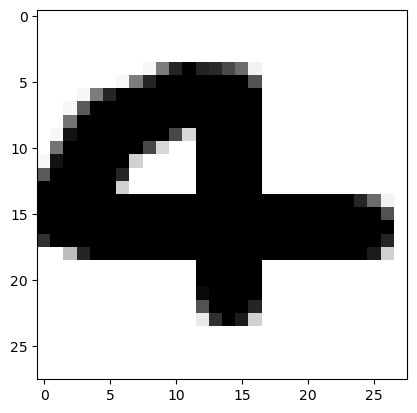

모델의 예측 : 5
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.]


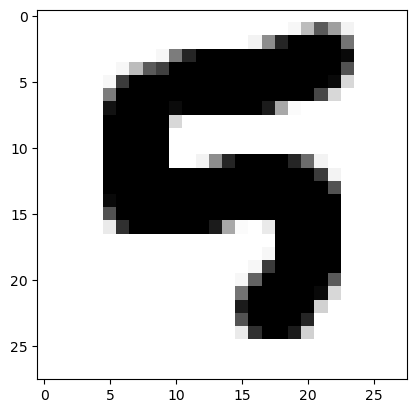

모델의 예측 : 6
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0. 100.   0.   0.   0.]


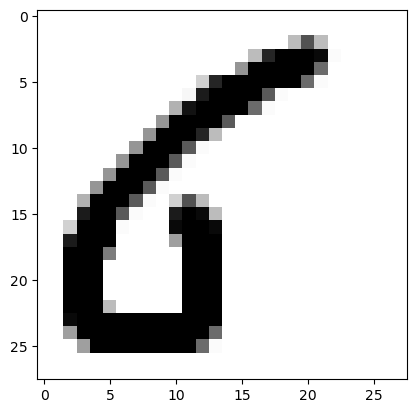

모델의 예측 : 2
모델의 카테고리별 확률 : [  0.   0. 100.   0.   0.   0.   0.   0.   0.   0.]


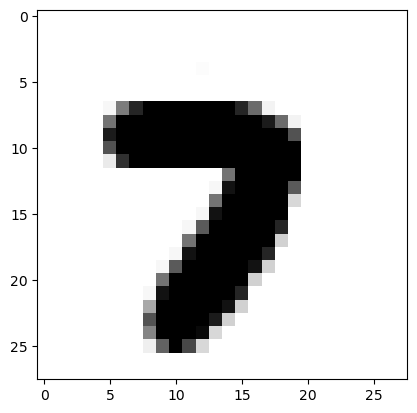

모델의 예측 : 7
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.]


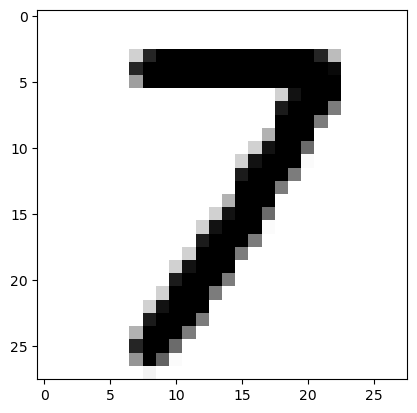

모델의 예측 : 8
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0.   0.   0. 100.   0.]


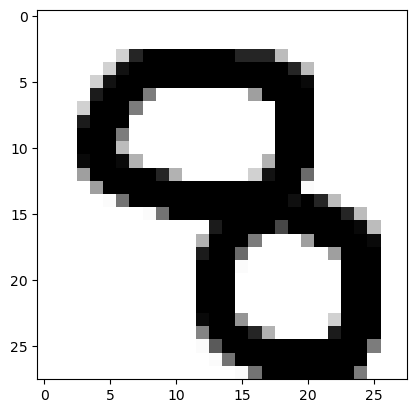

모델의 예측 : 9
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]


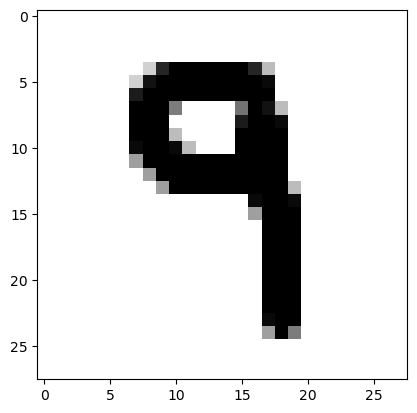

In [54]:
pred = model.predict(images)

for i in range(images.shape[0]) :
    print('====================================')
    print(f'모델의 예측 : {pred[i].argmax()}')
    print(f'모델의 카테고리별 확률 : {np.floor(pred[i]*100)}')

    plt.imshow(images[i].reshape(28,28) , cmap='Greys')
    plt.show()